In [13]:
%pip install seaborn
%pip install pandas

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('LATIHAN_ANALYSIS.csv')
df.head()

,D,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,0,0,US
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,CA
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,US
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,0,AUS


In [4]:
df.shape

(22, 27)

# Pertanyaan 1
apakah ada features yang tidak sesuai

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   D                    22 non-null     int64 
 1   Year_Birth           22 non-null     int64 
 2   Education            22 non-null     object
 3   Marital_Status       22 non-null     object
 4   Income               22 non-null     object
 5   Kidhome              22 non-null     int64 
 6   Teenhome             22 non-null     int64 
 7   Dt_Customer          22 non-null     object
 8   Recency              22 non-null     int64 
 9   MntWines             22 non-null     int64 
 10  MntFruits            22 non-null     int64 
 11  MntMeatProducts      22 non-null     int64 
 12  MntFishProducts      22 non-null     int64 
 13  MntSweetProducts     22 non-null     int64 
 14  MntGoldProds         22 non-null     int64 
 15  NumDealsPurchases    22 non-null     int64 
 16  NumWebPurc

In [7]:
# Kesimpulan: Income, Dt_Customer

In [8]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
        
    print()

D int64
1 10530

Year_Birth int64
1947 1989

Education object
['Graduation' 'PhD' '2n Cycle' 'Master']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow']

Income object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' '$32,474.00 ' '$21,474.00 '
 '$71,691.00 ' '$63,564.00 ' '$44,931.00 ' '$65,324.00 ' '$81,044.00 '
 '$62,499.00 ' '$67,786.00 ' '$26,872.00 ' '$4,428.00 ' '$54,809.00 '
 '$32,173.00 ' '$47,823.00 ' '$30,523.00 ' '$36,634.00 ' '$43,456.00 ']

Kidhome int64
0 2

Teenhome int64
0 1

Dt_Customer object
['6/16/2014' '6/15/2014' '5/13/2014' '5/11/2014' '4/8/2014' '3/17/2014'
 '1/29/2014' '1/18/2014' '1/11/2014' '12/27/2013' '12/9/2013' '12/7/2013'
 '10/16/2013' '10/5/2013' '9/11/2013' '8/1/2013' '7/23/2013' '7/1/2013'
 '5/28/2013' '3/26/2013']

Recency int64
0 0

MntWines int64
3 769

MntFruits int64
0 130

MntMeatProducts int64
1 535

MntFishProducts int64
0 240

MntSweetProducts int64
0 189

MntGoldProds int64
0 321

NumDealsPurchases int64
0 4

NumWebPurchas

In [9]:
df.Income

0     $84,835.00 
1     $57,091.00 
2     $67,267.00 
3     $32,474.00 
4     $21,474.00 
5     $71,691.00 
6     $63,564.00 
7     $44,931.00 
8     $65,324.00 
9     $65,324.00 
10    $81,044.00 
11    $62,499.00 
12    $67,786.00 
13    $26,872.00 
14     $4,428.00 
15    $54,809.00 
16    $54,809.00 
17    $32,173.00 
18    $47,823.00 
19    $30,523.00 
20    $36,634.00 
21    $43,456.00 
Name: Income, dtype: object

In [10]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')

In [12]:
df['Income'] = df['Income'].astype('float')

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   D                    22 non-null     int64         
 1   Year_Birth           22 non-null     int64         
 2   Education            22 non-null     object        
 3   Marital_Status       22 non-null     object        
 4   Income               22 non-null     float64       
 5   Kidhome              22 non-null     int64         
 6   Teenhome             22 non-null     int64         
 7   Dt_Customer          22 non-null     datetime64[ns]
 8   Recency              22 non-null     int64         
 9   MntWines             22 non-null     int64         
 10  MntFruits            22 non-null     int64         
 11  MntMeatProducts      22 non-null     int64         
 12  MntFishProducts      22 non-null     int64         
 13  MntSweetProducts     22 non-null     

# pertanyaan 2 
adakah duplicate, missing values atau outliers? bagaimana mengatasinnya

### duplicate

In [18]:
df.duplicated().sum()

0

### missing values

In [19]:
df.isna().sum().sort_values(ascending=False)

D                      0
MntGoldProds           0
Complain               0
Response               0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntSweetProducts       0
Year_Birth             0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Country                0
dtype: int64

### outliers

In [21]:
# karena data outliers yang datatype nya object tidak ada yang aneh, maka lanjut saja ngecek untuk kolom kolom yang continues

In [22]:
df.columns

Index(['D', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Response', 'Complain', 'Country'],
      dtype='object')

In [24]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['D','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1', 'Response','Complain'],
               inplace=True)

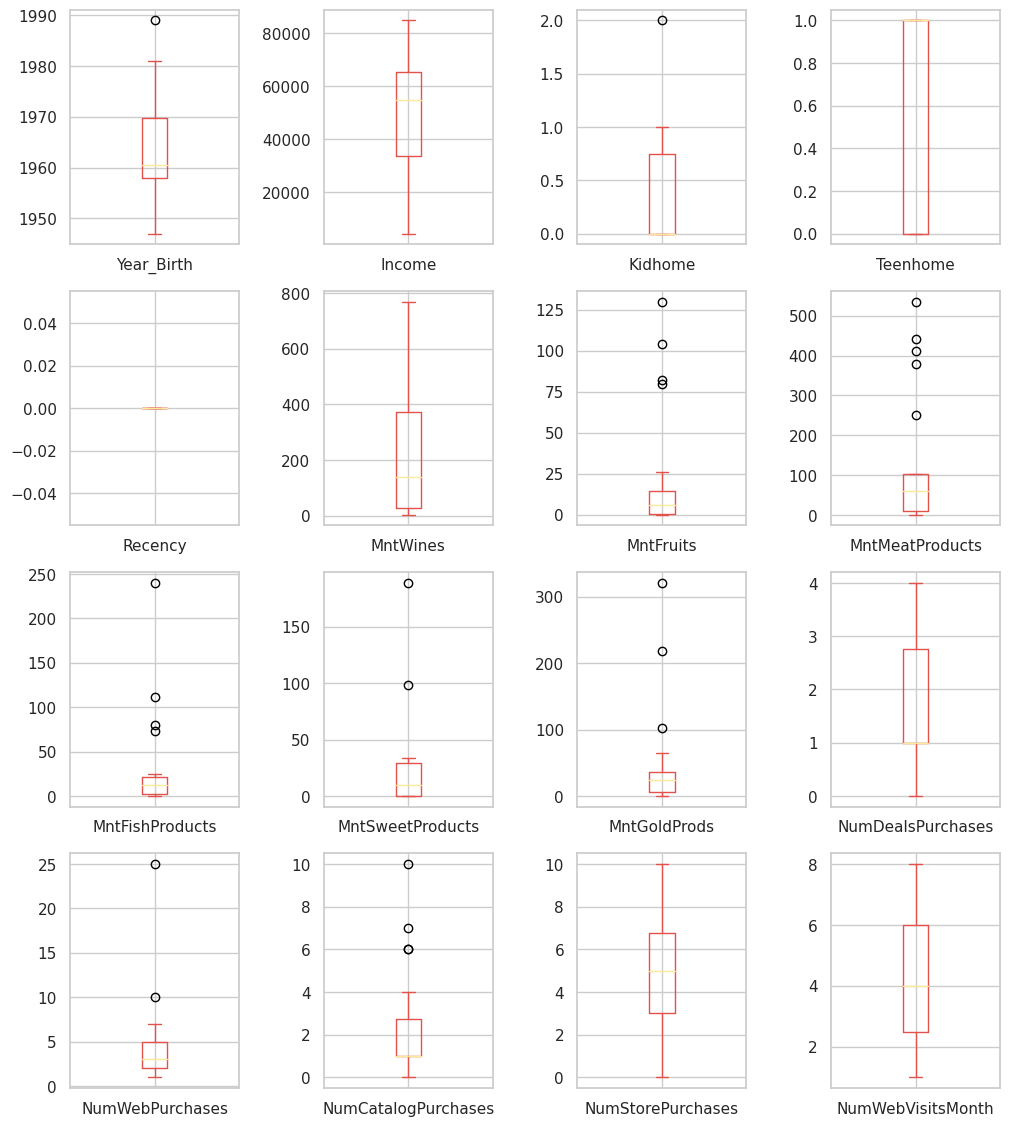

In [25]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

In [26]:
# karena tidak ada yang aneh maka kita lanjutkan ke pertanyaan ketiga

### pertanyaan 3
apakah data distribusi yang tidak masuk akal

In [27]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

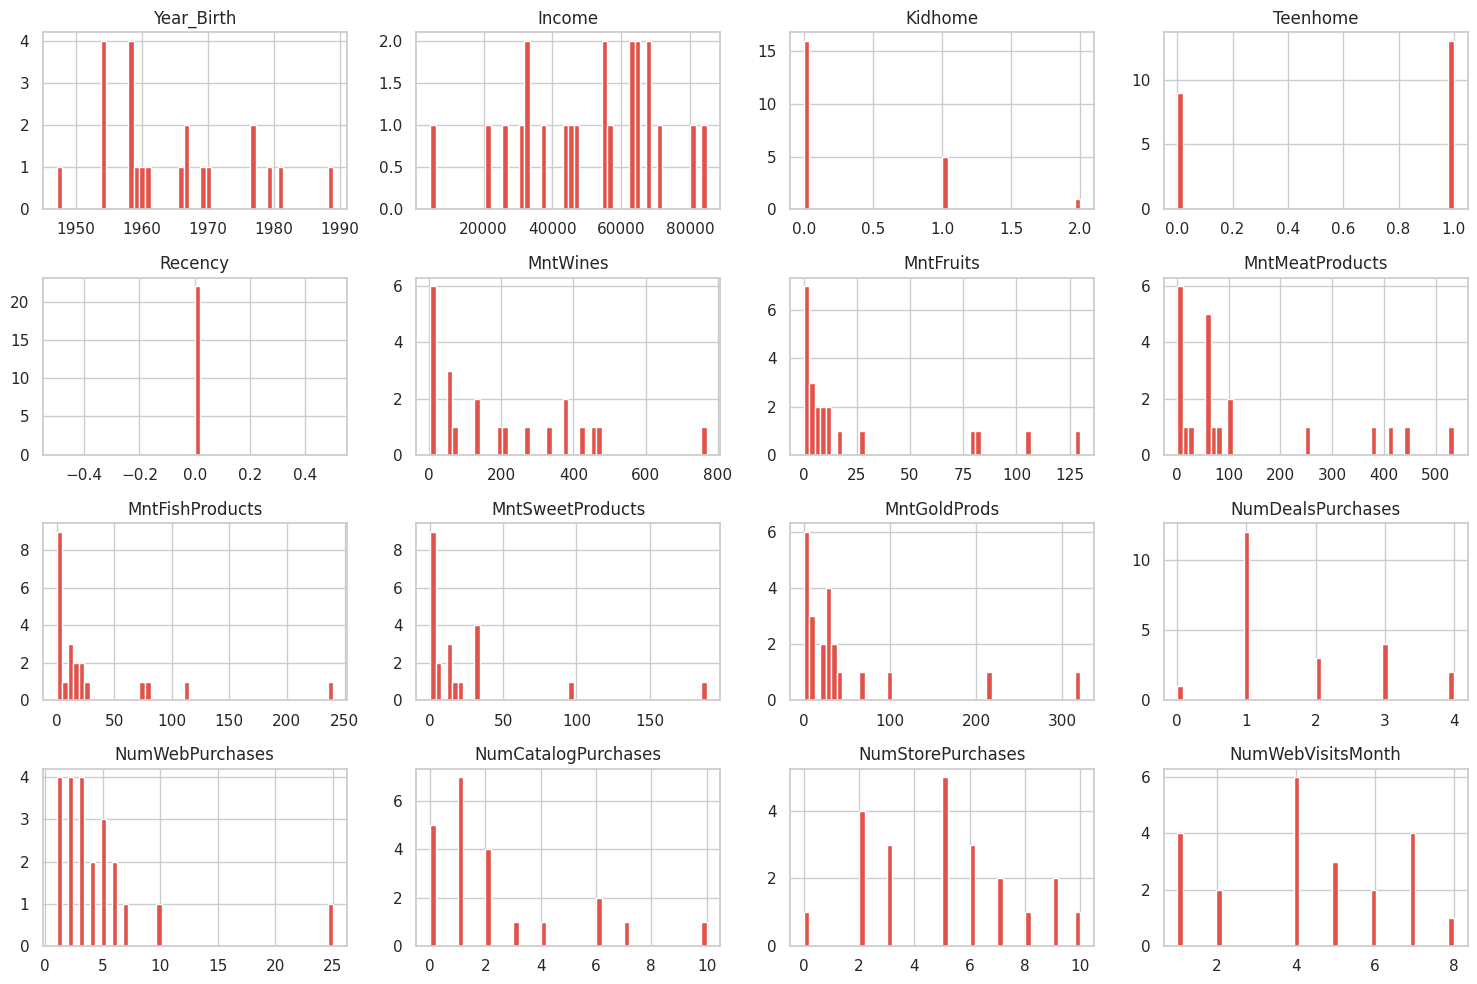

In [28]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

# data insight

In [29]:
df.head()

,D,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,0,0,US
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,CA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,US
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,0,AUS


In [30]:
# pertama kita lihat rentang umur berapa yang menerima penawaran dari campaign kita

In [31]:
# untuk menganalisis itu kita perlu membuat kolom umur

In [32]:
# kolom umur tersebut dapat dibuat dengan Dt_costumer

### Year Birth

In [33]:
df['Customer_Age']  = df['Dt_Customer'].dt.year - df['Year_Birth']

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

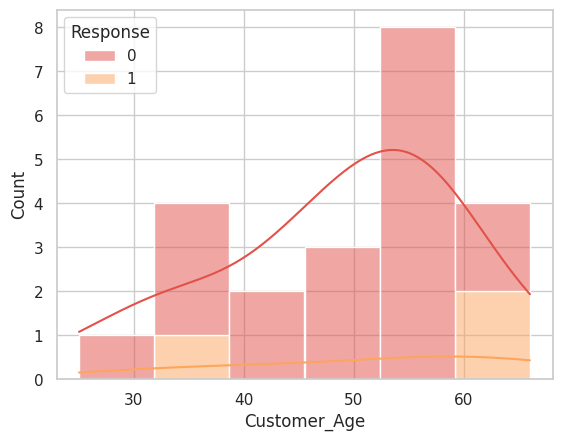

In [34]:
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True)

In [35]:
# umur itu sama dengan 1, yang nol itu adalah distribusi umur berdasarkan response

### education

In [37]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master'], dtype=object)

In [ ]:
# fungsi dibawah untuk mencari customer yang pendidikannya terbanyak

<AxesSubplot:xlabel='Education', ylabel='count'>

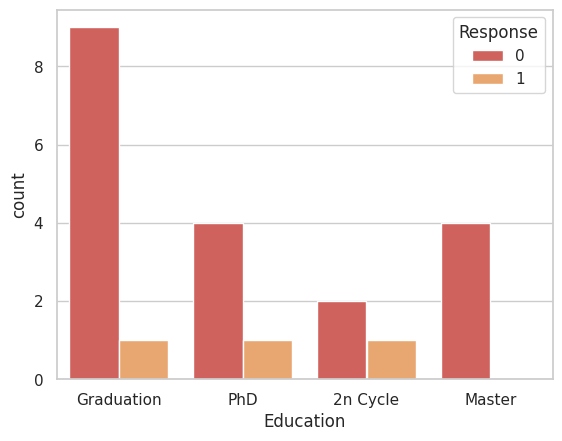

In [28]:
sns.countplot(data=df, x='Education', hue='Response')

In [7]:
# candle yang merah itu banyaknya orang lulusan apa, sedangkan orange itu adalah berapa orang yang lulusan tersebut menerima campaign perusahaan

In [8]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

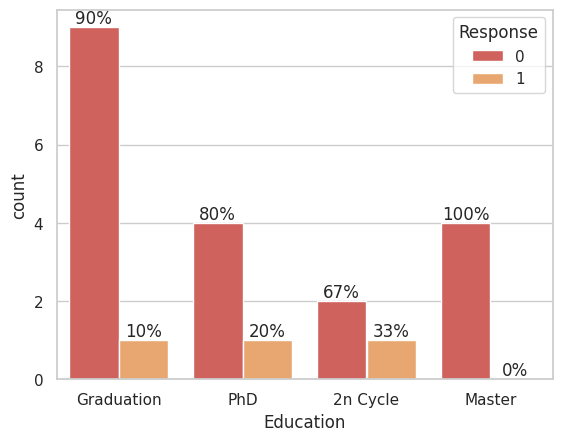

In [46]:
ax = sns.countplot(x='Education', hue='Response', data=df)
barPerc(df, 'Education', ax)

# Phd memiliki ketertarikan paling tinggi untuk menerima penawaran campaign

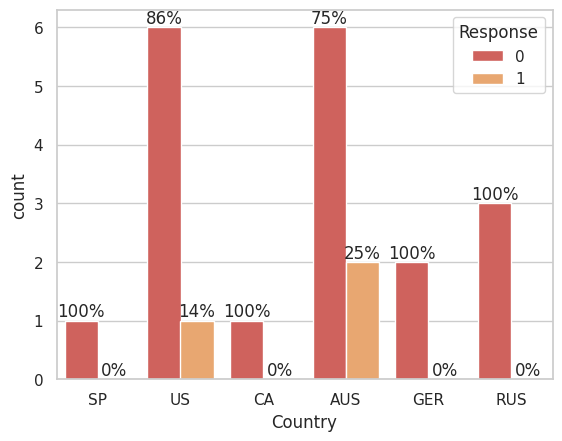

In [47]:
ax = sns.countplot(x='Country', hue='Response', data=df)
barPerc(df, 'Country', ax)